In [21]:
import os
import sys
import time
import numpy as np
import pandas as pd
import xarray as xr
from scipy.interpolate import interp1d
import matplotlib
%matplotlib inline
#matplotlib.rcParams['font.size'] = 12
import matplotlib.pyplot as plt
import matplotlib as mpl
import necstdb

In [2]:
cwd = os.getcwd()
db = necstdb.opendb(cwd)

In [3]:
def conv_xarray(db, topic, name=''):
    array_data = db.open_table(topic).read(astype="array")
    xarray_data = xr.DataArray(array_data['data'], dims=['timestamp'], coords={'timestamp' : array_data['timestamp']}, name=name)
    return xarray_data

def resample_pre(resample_xarray, reference_xarray, index="timestamp", kind="previous", **kwargs):
    resample_func = interp1d(resample_xarray[index].values, resample_xarray.values, kind, **kwargs)
    return resample_func(reference_xarray[index].values)

In [4]:
temp6 = conv_xarray(db, 'lakeshore_ch6')

In [8]:
time0 = temp6['timestamp'][0]

In [29]:
min_temp = temp6.min()

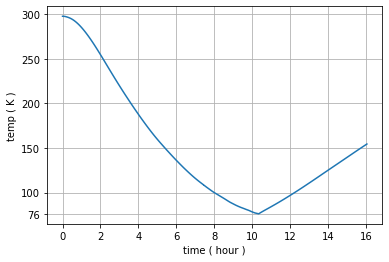

In [33]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot((temp6['timestamp']-time0)/3600, temp6.values)
ax.set_xlabel('time ( hour )')
ax.set_ylabel('temp ( K )')
ax.grid()
ax.yaxis.set_major_locator(mpl.ticker.FixedLocator(np.append(ax.get_yticks(), min_temp)))
plt.savefig('temp.pdf')